In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#reading in file
df = pd.read_csv('annotations_data.csv')

In [4]:
#for me to keep track of how many classification articles I currently have
#to be removed later
df_true = df[df['Is the article accurately labelled as classification?'] == 'Yes']
len(df_true)

52

In [30]:
df_true.head()


3                neural network, knowledge distillation
4                                        map regression
5                                        Graph analysis
7                        Graph analysis, Neural network
9     Graph analysis, Supervised learning, Neural ne...
16                                       Neural network
17                                       Neural network
18                                       Neural network
19                                       Neural network
20                                       Neural network
21                                       Neural network
22                                       Neural network
23                                       Neural network
24                                       Neural network
25                                       Neural network
26                                       Neural network
27                                       Neural network
28                                       Neural 

In [19]:
def count_answers(word_list, column):
#initialising the dictionary with the known answers
    method_dic = {}
    for word in word_list:
        method_dic[word.lower()] = 0

    for method in column:
        options = method.split(", ") #this also splits other answers with ,  
        for option in options:
            option = option.lower()
            if option not in method_dic: #checks if it is a different answer           
                method_dic[option] = 1
                break #ensures that even if the other answer has a , in it, it is only counted once    
            else: 
                method_dic[option] = method_dic.get(option)+1
   
    #adding a threshold, so only options with more than XX answer are seperately visualised, the rest are gathered
    #in the other category
    final_dic = {}
    final_dic['other'] = 0
    for key in method_dic.keys(): #deleting the option if only one article uses it and count it as other instead
        if method_dic.get(key) > 1: #playing around with the threshold
            final_dic[key] = method_dic.get(key)
        else: 
            final_dic['other'] = final_dic.get('other')+1
        #maybe a niche case where other is never used? but probably not an issue
    return final_dic

In [6]:

word_list = ['SVM', 'Graph analysis', 'Supervised learning', 'Unsupervised learning', 'Transfer learning', 'Neural network', 'bag of features','multiple kernel learning','Other']


In [7]:

perf_list = ['AUC', 'Specificity', 'Accuracy', 'Recall', 'F1 score', 'Sensitivity', 'mean', 'median', 'standard deviation', 'matthews correlation coefficient', 'Other']


In [8]:
def create_viz(df, word_list, column, plot_option, name, count_option, stacked_option):
    #narrowing down the df to classification labelled accurately and splitting into 2012 and 2021
    df_true = df[df['Is the article accurately labelled as classification?'] == 'Yes']
    df_2012 = df_true[df_true['Which year is the article from?'] == 2012]
    df_2021 = df_true[df_true['Which year is the article from?'] == 2021]
    
    #counting the answers 
    if count_option == 'multiple choice':
        data = {'2012': count_answers(word_list, df_2012.iloc[:, column]),
       '2021': count_answers(word_list, df_2021.iloc[:, column])}
        df = pd.DataFrame.from_dict(data)

    elif count_option == 'y/n':
        data = {'2012': count_yes_no(df_2012, column),
       '2021': count_yes_no(df_2021, column)}
        
        df = pd.DataFrame.from_dict(data)
        if name == 'Dataset type':
            row_names = {0:"Public", 1:"Private", 2:"Don't know"}
        else: row_names = {0:"Yes", 1:"No", 2:"Don't know"}
        
        df.rename(index= row_names, inplace=True)
  
   
        
    color_dic = {'2012': '#066570', '2021': '#5eb1bf'}
    
    if 'used' in name:
        fig = df.plot(kind = plot_option, title = name, stacked = stacked_option, color =color_dic)
        fig.set_xlabel('number of articles')
        plt.xticks(rotation = 0)
    else:
        fig = df.plot(kind = plot_option, title = name, stacked = stacked_option, color =color_dic)
        fig.set_ylabel('number of articles')
        plt.xticks(rotation = 45)
        
    for container in fig.containers:
        fig.bar_label(container, label_type='center', color = 'white')

    
    plt.savefig(name , bbox_inches='tight')
    
    
    return df


In [9]:
ethics_columns = [25, 27, 29, 31]

In [10]:
def count_yes_no(df, column):
    #creating a list of number of yes, no and don't know answers for a certain column in a df
    answer_list = [0,0,0] #[yes, no, don't know] [public, private, don't know]
    for input in df[df.columns[column]]:
        if input == 'Yes' or input == 'Public':
            answer_list[0] += 1
        elif input == 'No' or input == 'Private':
            answer_list[1] += 1
        else:
            answer_list[2] += 1
    return answer_list

In [11]:
def create_ethics_viz(df, columns, plot_option, name, year):
    #narrowing down the df to classification labelled accurately and splitting into 2012 and 2021
    df_true = df[df['Is the article accurately labelled as classification?'] == 'Yes']
    if year == 2012:
        df = df_true[df_true['Which year is the article from?'] == 2012]
    else:
        df = df_true[df_true['Which year is the article from?'] == 2021]
    
       
    #counting the answers
    data = {column:[] for column in columns}
    for column in columns:
        data[column] = count_yes_no(df, column)
    df = pd.DataFrame(data) 
    
    #renaming columns and rows

    column_names = {columns[0]:'Respect for persons', columns[1]:'Benefience', columns[2]:'Justice', columns[3]:'Repect for law/public interest'}
  
    row_names = {0:"Yes", 1:"No", 2:"Don't know"}

    df.rename(index= row_names, columns = column_names, inplace=True)
    
    color_dic = {'Yes': '#066570', 'No': '#5eb1bf', "Don't know": 'grey'}
   

    fig = df.transpose().plot(kind = plot_option, title = name, stacked = True, color = color_dic)
    for container in fig.containers:
        fig.bar_label(container, label_type='center', color = 'white')
    fig.set_xlabel("number of articles")
    fig.legend( loc='lower center', ncol=3)
    plt.savefig(name , bbox_inches='tight')



    return df

,2012,2021
Yes,15,5
No,11,21
Don't know,0,0


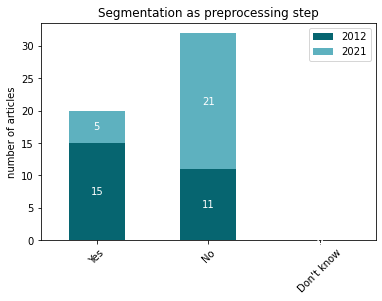

In [20]:
create_viz(df, [], 10, 'bar', 'Segmentation as preprocessing step', 'y/n', True)

,2012,2021
Public,6,16
Private,19,8
Don't know,1,2


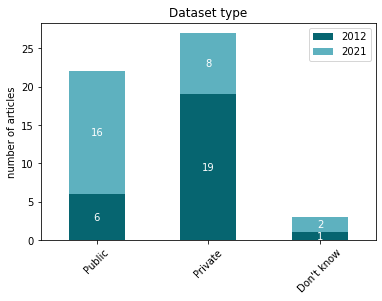

In [21]:
create_viz(df, [], 15, 'bar', 'Dataset type', 'y/n', True)

,2012,2021
Yes,13,21
No,13,5
Don't know,0,0


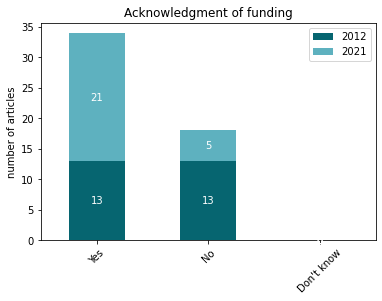

In [22]:
create_viz(df, [], 23, 'bar', 'Acknowledgment of funding', 'y/n', True)

,2012,2021
other,14.0,11.0
svm,11.0,NaN
graph analysis,4.0,3.0
unsupervised learning,2.0,NaN
logistic classifier,2.0,NaN
neural network,NaN,22.0


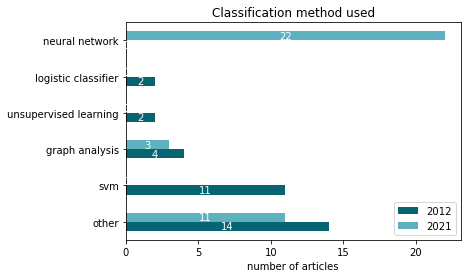

In [20]:
create_viz(df, word_list, 8, 'barh', 'Classification method used', 'multiple choice', False)

,2012,2021
other,6.0,9
auc,6.0,14
specificity,5.0,9
accuracy,19.0,13
recall,5.0,4
f1 score,2.0,8
sensitivity,7.0,10
precision,6.0,3
balanced accuracy,NaN,2


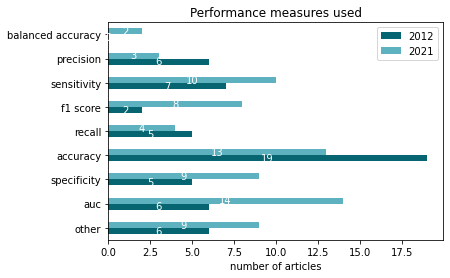

In [21]:
create_viz(df, perf_list, 9,'barh', 'Performance measures used', 'multiple choice', False)

,Respect for persons,Benefience,Justice,Repect for law/public interest
Yes,1,0,0,4
No,25,26,26,21
Don't know,0,0,0,1


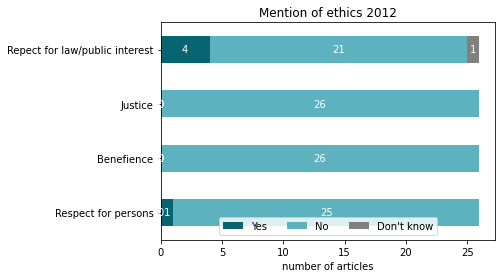

In [25]:
create_ethics_viz(df, ethics_columns, 'barh', 'Mention of ethics 2012', 2012)

,Respect for persons,Benefience,Justice,Repect for law/public interest
Yes,1,2,0,13
No,25,23,26,13
Don't know,0,1,0,0


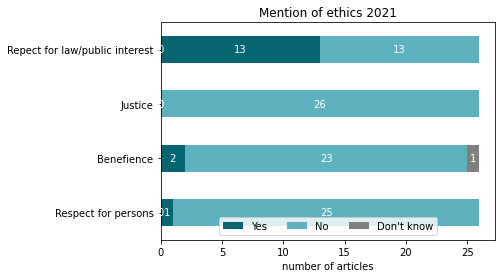

In [26]:
create_ethics_viz(df, ethics_columns, 'barh', 'Mention of ethics 2021', 2021)